<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [30]:
sum(data['stop_comments'].isnull())

0

In [31]:
data = data[data['stop_comments'].notnull()]

In [32]:
sum(data['stop_comments'].isnull())

0

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [35]:
X_train.shape

(5794,)

In [36]:
X_test.shape

(1449,)

In [37]:
data['pol_cat'].value_counts()

1    3715
0    3528
Name: pol_cat, dtype: int64

## **Gonna Apply Logistic Regression**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#vect = CountVectorizer()
#tf_train = vect.fit_transform(X_train)
#tf_test = vect.transform(X_test)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [41]:
tf_train

<5794x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 69820 stored elements in Compressed Sparse Row format>

In [42]:
tf_train.toarray()[0].sum()

3.109511739791509

In [43]:
#vect?

In [44]:
#vect.get_feature_names()

In [45]:
#X_train[0]

In [46]:
#for i in tf_train.toarray()[0]:
#  if (i != 0):
#    print(i)

In [47]:
tf_train.shape

(5794, 8118)

**Print the Vocabulary**

In [48]:
#print(vect.vocabulary_)

In [49]:
#vocab = vect.vocabulary_

In [50]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [51]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(tf_train, y_train)

SVC(kernel='linear')

**Accuracy score on training dataset**

In [52]:
prediction_linear = classifier_linear.predict(tf_test)
# results
report = classification_report(y_test, prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.9232914923291492, 'recall': 0.8664921465968587, 'f1-score': 0.8939905469277515, 'support': 764}
negative:  {'precision': 0.860655737704918, 'recall': 0.9197080291970803, 'f1-score': 0.8892025405786873, 'support': 685}


**Accuracy score on test dataset i.e got from the splitting**

In [53]:
 classifier_linear.score(tf_test, y_test)

0.8916494133885439

**Make predictions on the test dataset i.e. unseen data to the model**

In [54]:
expected = y_test
predicted = classifier_linear.predict(tf_test)

**plot confusion matrix for the test dataset**

In [55]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [56]:
pip install mlxtend

[[662 102]
 [ 55 630]]


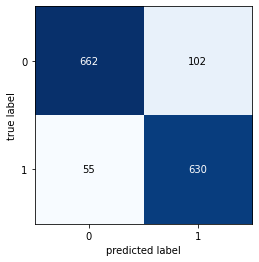

In [57]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [58]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       685
           1       0.92      0.87      0.89       764

    accuracy                           0.89      1449
   macro avg       0.89      0.89      0.89      1449
weighted avg       0.89      0.89      0.89      1449



**find the F1 score**

In [59]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8915965437532194

# **Test the model with the comments of the other video**

In [60]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [61]:
sum(data_test['stop_comments'].isnull())

1

In [62]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [63]:
sum(data_test['stop_comments'].isnull())

0

In [64]:
data_test['pol_cat'].value_counts()

1    832
0    673
Name: pol_cat, dtype: int64

In [65]:
tf_test = vect.transform(data_test['stop_comments'])

In [66]:
tf_test

<1505x8118 sparse matrix of type '<class 'numpy.float64'>'
	with 13797 stored elements in Compressed Sparse Row format>

In [67]:
tf_test.toarray()[0].sum()

1.2038758500686517

In [68]:
tf_train.toarray().shape

(5794, 8118)

In [69]:
tf_test.toarray().shape

(1505, 8118)

[[662 102]
 [ 55 630]]


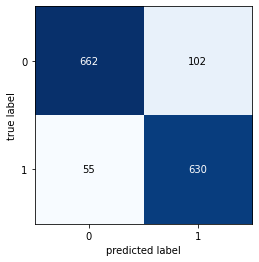

In [70]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [71]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       685
           1       0.92      0.87      0.89       764

    accuracy                           0.89      1449
   macro avg       0.89      0.89      0.89      1449
weighted avg       0.89      0.89      0.89      1449



In [72]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8915965437532194

In [73]:
classifier_linear.score(tf_test, data_test['pol_cat'])

0.9222591362126246